### Loading the dataset

In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
from nltk.corpus import reuters

In [3]:
import nltk
nltk.download('reuters')

[nltk_data] Downloading package reuters to C:\Users\Nichelle
[nltk_data]     Machado\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!


True

In [4]:
reuters.fileids()[:10]

['test/14826',
 'test/14828',
 'test/14829',
 'test/14832',
 'test/14833',
 'test/14839',
 'test/14840',
 'test/14841',
 'test/14842',
 'test/14843']

In [5]:
cats = reuters.categories()
print("Reuters has %d categories:\n%s" % (len(cats), cats))

Reuters has 90 categories:
['acq', 'alum', 'barley', 'bop', 'carcass', 'castor-oil', 'cocoa', 'coconut', 'coconut-oil', 'coffee', 'copper', 'copra-cake', 'corn', 'cotton', 'cotton-oil', 'cpi', 'cpu', 'crude', 'dfl', 'dlr', 'dmk', 'earn', 'fuel', 'gas', 'gnp', 'gold', 'grain', 'groundnut', 'groundnut-oil', 'heat', 'hog', 'housing', 'income', 'instal-debt', 'interest', 'ipi', 'iron-steel', 'jet', 'jobs', 'l-cattle', 'lead', 'lei', 'lin-oil', 'livestock', 'lumber', 'meal-feed', 'money-fx', 'money-supply', 'naphtha', 'nat-gas', 'nickel', 'nkr', 'nzdlr', 'oat', 'oilseed', 'orange', 'palladium', 'palm-oil', 'palmkernel', 'pet-chem', 'platinum', 'potato', 'propane', 'rand', 'rape-oil', 'rapeseed', 'reserves', 'retail', 'rice', 'rubber', 'rye', 'ship', 'silver', 'sorghum', 'soy-meal', 'soy-oil', 'soybean', 'strategic-metal', 'sugar', 'sun-meal', 'sun-oil', 'sunseed', 'tea', 'tin', 'trade', 'veg-oil', 'wheat', 'wpi', 'yen', 'zinc']


In [6]:
# total = len(reuters.paras())
# total_multi = 0
# for c in cats:
#     lc = len(reuters.paras(categories=[c]))
#     total_multi += lc
#     print("%s ---- %d documents out of %d" % (c, lc, total))
# print("Articles belong to %.4f categories on average" % ((total_multi * 1.0) / total))
# print("There are %.4f articles per category on average" % ((total * 1.0) / len(cats)))

In [134]:
reuters.fileids(categories=['jobs'])

['test/14867',
 'test/14974',
 'test/15045',
 'test/15365',
 'test/15485',
 'test/16100',
 'test/16158',
 'test/17633',
 'test/18533',
 'test/18539',
 'test/18616',
 'test/18672',
 'test/18987',
 'test/18990',
 'test/18993',
 'test/18996',
 'test/19000',
 'test/19985',
 'test/19986',
 'test/20248',
 'test/21525',
 'training/10135',
 'training/1040',
 'training/11159',
 'training/11160',
 'training/11276',
 'training/12507',
 'training/12534',
 'training/12555',
 'training/12743',
 'training/12752',
 'training/12818',
 'training/14771',
 'training/2000',
 'training/2197',
 'training/2618',
 'training/2746',
 'training/3024',
 'training/3472',
 'training/3520',
 'training/3717',
 'training/4036',
 'training/4091',
 'training/4306',
 'training/4698',
 'training/4700',
 'training/5215',
 'training/5392',
 'training/6158',
 'training/6603',
 'training/6951',
 'training/7004',
 'training/7010',
 'training/7013',
 'training/7070',
 'training/8173',
 'training/867',
 'training/8681',
 'trainin

### Choosing the document and converting it to a string

In [135]:
s = reuters.words('training/9897')

In [136]:
def listToString(s): 
    
    # initialize an empty string
    str1 = " " 
    
    # return string  
    return (str1.join(s))

In [137]:
article= listToString(s)
article

'KEATING REVISES DOWN AUSTRALIAN GROWTH FORECAST Treasurer Paul Keating forecast economic growth at slightly under two pct in the financial year ending June this year , down from the 2 . 25 pct forecast contained in the 1986 / 87 budget delivered last August . Australia \' s terms of trade also fell , by 18 pct , over the past two years , he told Parliament . Terms of trade are the difference between import and export price indexes . Despite the figures , the budget forecast of about 1 . 75 pct annual growth in employment would be met , Keating said . Unemployment is currently at 8 . 2 pct of the workforce . " This government is dragging Australia through a trading holocaust the kind of which we have not seen since the Second World War ," Keating said . " We are not pushing this place into a recession . We are not only holding our gains on unemployment , we are bringing unemployment down ," he said , adding that the government had help the country avoid recession .'

### Preprocessing

In [138]:
import re

# Code to remove special characters
article = article.replace("'", "") #apostrophe
article = article.replace('"',"") #double quotes
#article = article.replace(",","") #comma
article = article.replace(" . ", ".") #removing space between '.'
#article = article.replace(" / ", "/") #removing space between '/'
article = re.sub('\s+[a-zA-Z]\s+', ' ',article) #removing single alphabetical characters
article = re.sub(" pct|PCT", "%", article) #replacing 'pct' with the symbol '%'
article = article.replace("dlrs","dlr")
article = article.replace("mln", "million")
article = article.replace("U.S.", "United States of America ")



In [139]:
article

'KEATING REVISES DOWN AUSTRALIAN GROWTH FORECAST Treasurer Paul Keating forecast economic growth at slightly under two% in the financial year ending June this year , down from the 2.25% forecast contained in the 1986 / 87 budget delivered last August.Australia terms of trade also fell , by 18% , over the past two years , he told Parliament.Terms of trade are the difference between import and export price indexes.Despite the figures , the budget forecast of about 1.75% annual growth in employment would be met , Keating said.Unemployment is currently at 8.2% of the workforce. This government is dragging Australia through trading holocaust the kind of which we have not seen since the Second World War , Keating said. We are not pushing this place into recession.We are not only holding our gains on unemployment , we are bringing unemployment down , he said , adding that the government had help the country avoid recession .'

In [140]:
# import nltk
# from nltk.corpus import stopwords
# nltk.download('stopwords')

In [141]:
# stop_words = stopwords.words('english')

# def remove_stopwords(text):
#     text = ' '.join(word for word in text.split(' ') if word not in stop_words)
#     return text
    
# article= remove_stopwords(article)


### NER

In [142]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [221]:
# Load the needed dependencies from SpaCy
import spacy
from spacy import displacy
import en_core_web_trf

# Create an instance of the small pipeline and model from SpaCy
nlp = en_core_web_trf.load()

In [222]:
# Apply the complete NER pipeline from SpaCy (preprocessing + model prediction)
doc = nlp(article)

# Show the entities detected in a nice way
displacy.render(doc, jupyter=True, style='ent')

In [145]:
# Loop over all the tokens preprocessed by SpaCy
for token in doc:
    # If the token is detected as an entity
    if token.ent_type_:
        print(f"{token.text}: {token.ent_type_}")

KEATING: PERSON
AUSTRALIAN: NORP
Paul: PERSON
Keating: PERSON
the: DATE
financial: DATE
year: DATE
ending: DATE
June: DATE
this: DATE
year: DATE
2.25: PERCENT
%: PERCENT
1986: DATE
/: DATE
87: DATE
last: DATE
August: DATE
Australia: GPE
18: PERCENT
%: PERCENT
the: DATE
past: DATE
two: DATE
years: DATE
Parliament: ORG
about: PERCENT
1.75: PERCENT
%: PERCENT
Keating: PERSON
8.2: PERCENT
%: PERCENT
Australia: GPE
the: EVENT
Second: EVENT
World: EVENT
War: EVENT
Keating: PERSON


In [146]:
entity_type=[]
entity=[]
for ent in doc.ents:
    entity.append(ent)
    entity_type.append(ent.label_)

In [147]:
import pandas as pd

In [148]:
df = pd.DataFrame(list(zip(entity, entity_type)), columns=['Entity', 'Entity Type'])

In [149]:
df

,Entity,Entity Type
0,(KEATING),PERSON
1,(AUSTRALIAN),NORP
2,"(Paul, Keating)",PERSON
3,"(the, financial, year, ending, June, this, year)",DATE
4,"(2.25, %)",PERCENT
5,"(1986, /, 87)",DATE
6,"(last, August)",DATE
7,(Australia),GPE
8,"(18, %)",PERCENT
9,"(the, past, two, years)",DATE


### Visualization of the document

In [150]:
displacy.render(doc, style="dep",options={'compact': True, 'distance': 200})

In [160]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [161]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS

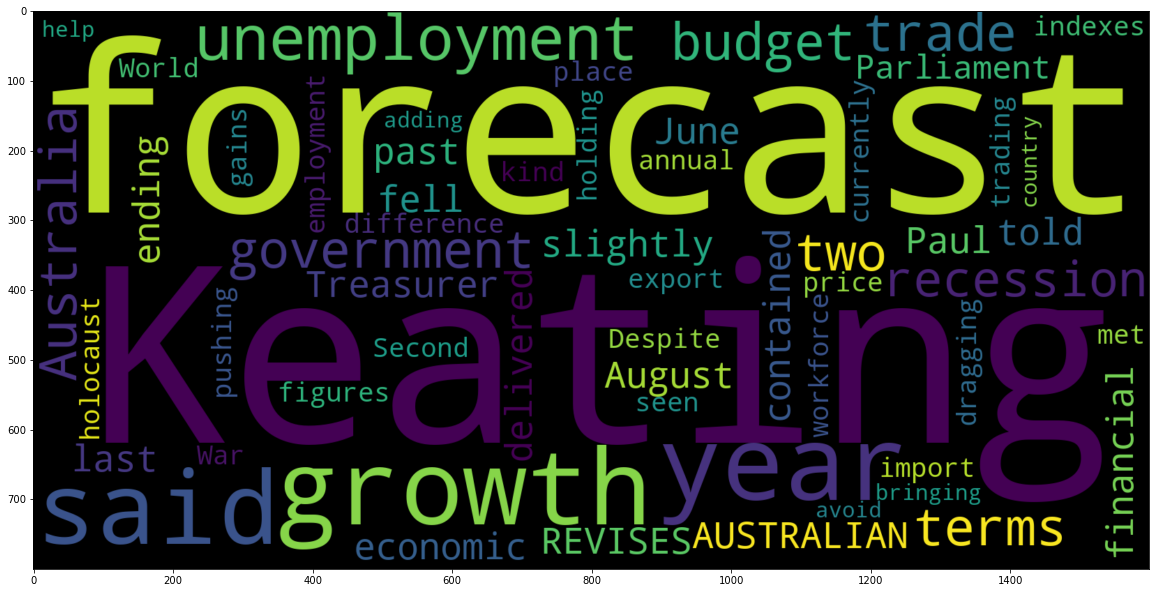

In [162]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(article)
plt.imshow(wc , interpolation = 'bilinear')

### Entity Linking

source: https://towardsdatascience.com/from-text-to-knowledge-the-information-extraction-pipeline-b65e7e30273e

In [191]:
import urllib
from string import punctuation
import nltk

ENTITY_TYPES = ["human", "person", "company", "enterprise", "business", "geographic region",
                "country", "human settlement", "geographic entity", "territorial entity type", "organization",
                "social issue", "social relation","status", "relation", "abstract object",
                "economic branch", "system", "structure", "entity"]

def wikifier(text, lang="en", threshold=0.8):
    """Function that fetches entity linking results from wikifier.com API"""
    # Prepare the URL.
    data = urllib.parse.urlencode([
        ("text", text), ("lang", lang),
        ("userKey", "tgbdmkpmkluegqfbawcwjywieevmza"),
        ("pageRankSqThreshold", "%g" %
         threshold), ("applyPageRankSqThreshold", "true"),
        ("nTopDfValuesToIgnore", "100"), ("nWordsToIgnoreFromList", "100"),
        ("wikiDataClasses", "true"), ("wikiDataClassIds", "false"),
        ("support", "true"), ("ranges", "false"), ("minLinkFrequency", "2"),
        ("includeCosines", "false"), ("maxMentionEntropy", "3")
    ])
    url = "http://www.wikifier.org/annotate-article"
    # Call the Wikifier and read the response.
    req = urllib.request.Request(url, data=data.encode("utf8"), method="POST")
    with urllib.request.urlopen(req, timeout=60) as f:
        response = f.read()
        response = json.loads(response.decode("utf8"))
    # Output the annotations.
    results = list()
    for annotation in response["annotations"]:
        # Filter out desired entity classes
        if ('wikiDataClasses' in annotation) and (any([el['enLabel'] in ENTITY_TYPES for el in annotation['wikiDataClasses']])):

            # Specify entity label
            if any([el['enLabel'] in ["human", "person"] for el in annotation['wikiDataClasses']]):
                label = 'Person'
            elif any([el['enLabel'] in ["country", "geographic region", "human settlement", "geographic entity", "territorial entity type"] for el in annotation['wikiDataClasses']]):
                label = 'Location'
            elif any([el['enLabel'] in ["company", "enterprise", "business", "organization"] for el in annotation['wikiDataClasses']]):
                label = 'Organization'
            elif any([el['enLabel'] in ["social issue", "social relation", "relation", "abstract object"] for el in annotation['wikiDataClasses']]):
                label = 'Status/Event'
            elif any([el['enLabel'] in ["economic branch", "system", "structure"] for el in annotation['wikiDataClasses']]):
                label = 'Economic branch'
    
            else:
                label = None

            results.append({'title': annotation['title'], 'wikiId': annotation['wikiDataItemId'], 'label': label,
                            'characters': [(el['chFrom'], el['chTo']) for el in annotation['support']]})
    return results

In [192]:
import json

In [193]:
linking = wikifier(article)

In [ ]:
linking

In [186]:
import pandas as pd

In [187]:
output = pd.DataFrame()
df = output.append(linking, ignore_index=True)
df

,title,wikiId,label,characters
0,Paul Keating,Q242654,Person,"[(58, 69), (63, 69), (515, 521), (708, 714)]"
1,Trade,Q601401,Economic branch,"[(269, 273), (350, 354), (626, 632)]"
2,Australia,Q408,Location,"[(608, 616)]"
3,World War II,Q362,Status/Event,"[(685, 704), (689, 700), (689, 704), (696, 704)]"
4,Unemployment,Q41171,Status/Event,"[(804, 815), (835, 846)]"


In [169]:
df.to_csv('linked_entities_jobs_9897.csv', sep=';', index=False)

### Entity Relation Extraction

In [233]:
import re 
import string 
import nltk 
import spacy 
import pandas as pd 
import numpy as np 
import math 
from tqdm import tqdm 

from spacy.matcher import Matcher 
from spacy.tokens import Span 
from spacy import displacy 

pd.set_option('display.max_colwidth', 200)

In [234]:
# print token, dependency, POS tag 
for tok in doc: 
  print(tok.text, "-->",tok.dep_,"-->", tok.pos_)

KEATING --> nsubj --> PROPN
REVISES --> ROOT --> VERB
DOWN --> advmod --> ADV
AUSTRALIAN --> amod --> ADJ
GROWTH --> compound --> PROPN
FORECAST --> npadvmod --> PROPN
Treasurer --> compound --> PROPN
Paul --> compound --> PROPN
Keating --> nsubj --> PROPN
forecast --> conj --> VERB
economic --> amod --> ADJ
growth --> dobj --> NOUN
at --> prep --> ADP
slightly --> advmod --> ADV
under --> prep --> ADP
two% --> pobj --> NOUN
in --> prep --> ADP
the --> det --> DET
financial --> amod --> ADJ
year --> pobj --> NOUN
ending --> acl --> VERB
June --> npadvmod --> PROPN
this --> det --> DET
year --> npadvmod --> NOUN
, --> punct --> PUNCT
down --> advmod --> ADV
from --> prep --> ADP
the --> det --> DET
2.25 --> nummod --> NUM
% --> compound --> NOUN
forecast --> pobj --> NOUN
contained --> acl --> VERB
in --> prep --> ADP
the --> det --> DET
1986 --> nummod --> NUM
/ --> punct --> SYM
87 --> prep --> NUM
budget --> pobj --> NOUN
delivered --> acl --> VERB
last --> amod --> ADJ
August --> np

In [235]:
# Matcher class object 
matcher = Matcher(nlp.vocab) 

#define the pattern 
pattern = [{'POS':'NOUN'}, 
           {'LOWER': 'at'}, 
           {'POS': 'NUM'}]

In [236]:
matches = matcher(doc)
for match_id, start, end in matches:
    string_id = nlp.vocab.strings[match_id]  # Get string representation
    span = doc[start:end]  # The matched span
    print(match_id, string_id, start, end, span.text)

C:\Users\Nichelle Machado\anaconda3\envs\NER_proj\lib\site-packages\ipykernel_launcher.py:1: UserWarning: [W036] The component 'matcher' does not have any patterns defined.
  """Entry point for launching an IPython kernel.
